In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from tqdm import tqdm

%matplotlib inline

In [2]:
# Laden der FER-2013 Daten
data_path = '../data/fer2013_training_onehot.csv'
data = pd.read_csv(data_path)

In [3]:
data.head()

,70,80,82,72,58,58.1,60,63,54,58.2,...,106.8,109.10,82.10,1,0,0.1,0.2,0.3,0.4,0.5
0,151,150,147,155,148,133,111,140,170,174,...,193,183,184,1,0,0,0,0,0,0
1,231,212,156,164,174,138,161,173,182,200,...,88,110,152,0,0,1,0,0,0,0
2,24,32,36,30,32,23,19,20,30,41,...,142,143,142,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,30,29,30,0,0,0,0,0,0,1
4,55,55,55,55,55,54,60,68,54,85,...,34,30,57,0,0,1,0,0,0,0


In [4]:
# Verteilung der Emotionen
emotion_counts = data['emotion'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Verteilung der Emotionen im FER-2013 Trainingsdatensatz')
plt.xlabel('Emotion')
plt.ylabel('Anzahl der Bilder')
plt.show()

KeyError: 'emotion'

In [ ]:
# Anzeige von Beispielbildern
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i in range(10):
    img = data['pixels'][i]
    img = np.fromstring(img, sep=' ').reshape(48, 48).astype(np.uint8)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Emotion: {data['emotion'][i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

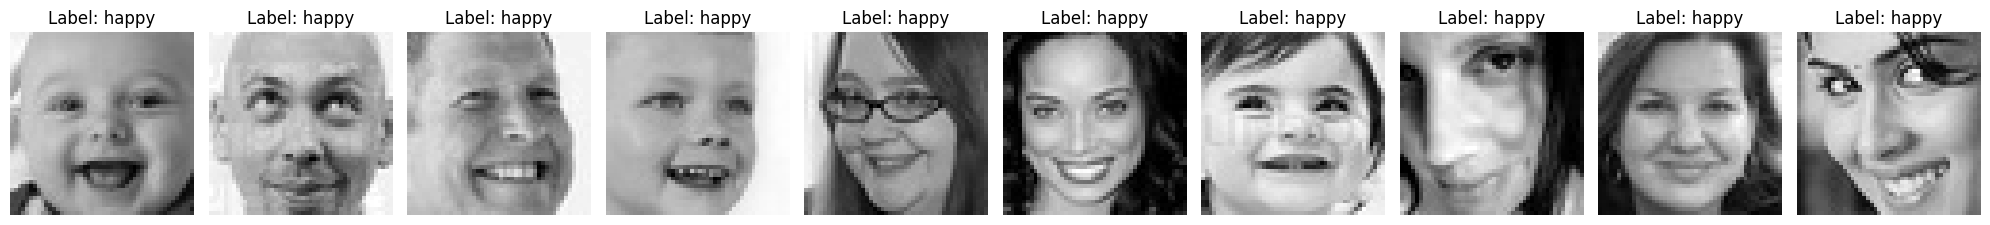

In [6]:
# Pfad zum Bildverzeichnis
image_folder = '../data/images'

def load_and_display_images(image_folder, num_images=10):
    images = []
    labels = []
    
    for root, dirs, files in os.walk(image_folder):
        for file in files[:num_images]:
            if file.endswith(('png', 'jpg', 'jpeg')):
                label = os.path.basename(root)
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                images.append(img)
                labels.append(label)
    
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    axes = axes.ravel()
    
    for i in range(num_images):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Anzeigen von Beispielbildern aus dem Verzeichnis
load_and_display_images(image_folder, num_images=10)